In [36]:
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import numpy as np
import pandas as pd
from pathlib import Path

import sys
sys.path.append('../src')

import matplotlib.pyplot as plt

import utils
from dataset import M5Dataset
import preprocessing
import features
from evaluater import WRMSSEEvaluator

In [38]:
df = utils.load_pickle('../features/baseline_features.pkl')

In [39]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,demand,part,date,wm_yr_wk,...,lag_t28_rolling_std_t180_item_store,price_change_t1,price_change_t365,rolling_price_std_t7,rolling_price_std_t30,year,month,week,day,dayofweek
0,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,0,train,2011-01-29,11101,...,NaN,NaN,NaN,NaN,NaN,2011,1,4,29,5
1,HOBBIES_1_001_CA_2_validation,1437,3,1,1,0,0,train,2011-01-29,11101,...,NaN,NaN,NaN,NaN,NaN,2011,1,4,29,5
2,HOBBIES_1_001_CA_3_validation,1437,3,1,2,0,0,train,2011-01-29,11101,...,NaN,NaN,NaN,NaN,NaN,2011,1,4,29,5
3,HOBBIES_1_001_CA_4_validation,1437,3,1,3,0,0,train,2011-01-29,11101,...,NaN,NaN,NaN,NaN,NaN,2011,1,4,29,5
4,HOBBIES_1_002_CA_1_validation,1438,3,1,0,0,0,train,2011-01-29,11101,...,NaN,NaN,NaN,NaN,NaN,2011,1,4,29,5


In [40]:
df.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'demand',
       'part', 'date', 'wm_yr_wk',
       ...
       'lag_t28_rolling_std_t180_item_store', 'price_change_t1',
       'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30',
       'year', 'month', 'week', 'day', 'dayofweek'],
      dtype='object', length=167)

In [41]:
train_df=df[(df['date'] <= '2016-04-24')]
test_df=df[(df['date'] > '2016-04-24')]

In [42]:
def show_feat_hist(train_df, test_df, col, bins=10, density=True):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
#     target_col = 'lag_t28_item'
    fig.suptitle(f'{col}')
    ax1.hist(train_df[col], bins=bins, density=density)
    ax2.hist(test_df[col], bins=bins, density=density)
#     fig.savefig(f'{col}.png')
    fig.show()

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


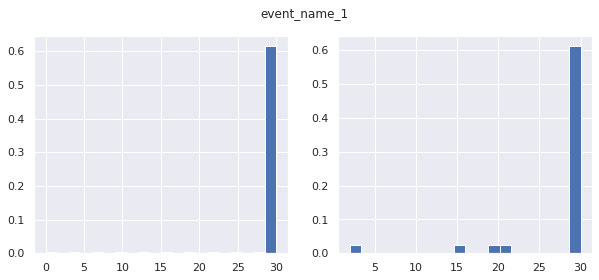

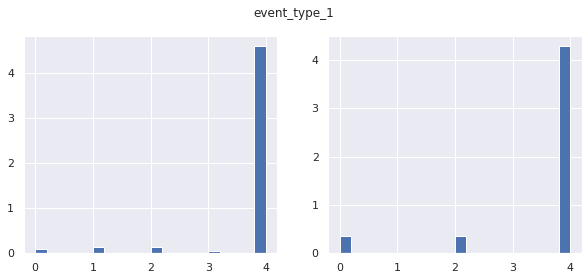

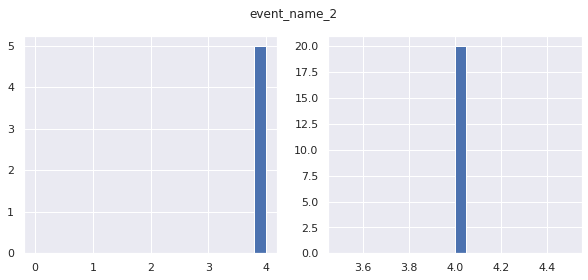

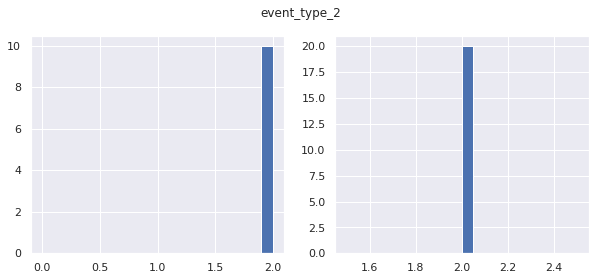

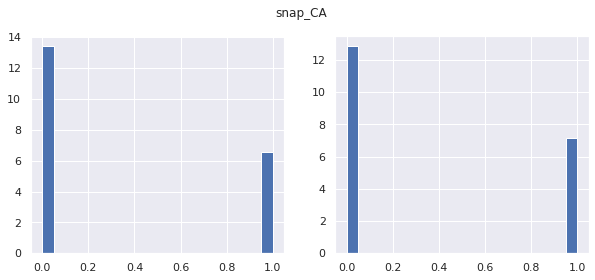

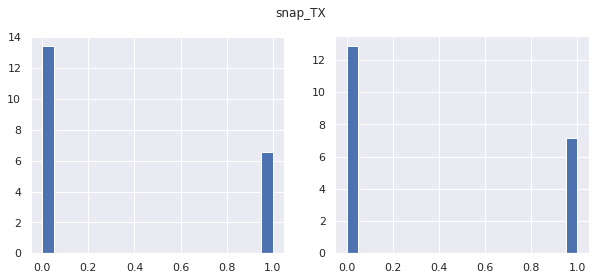

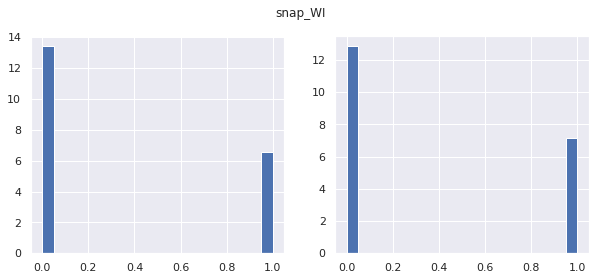

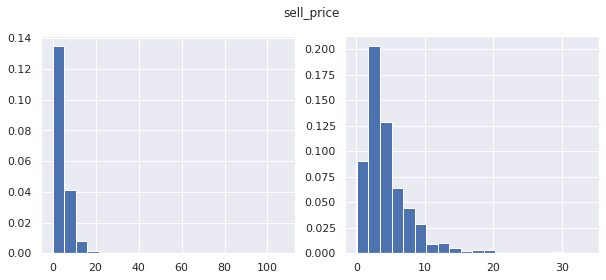

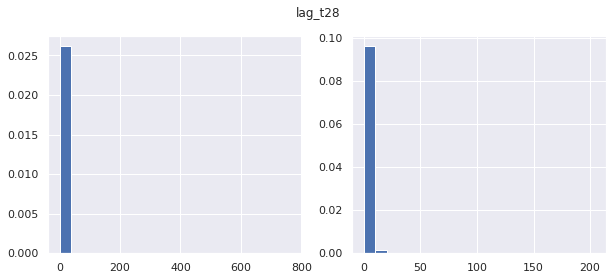

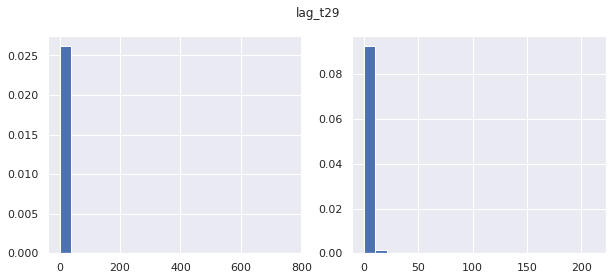

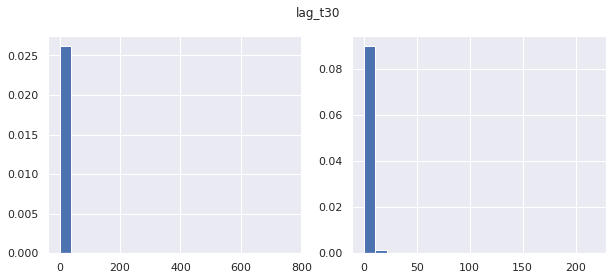

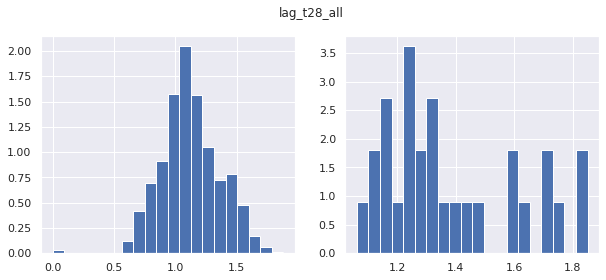

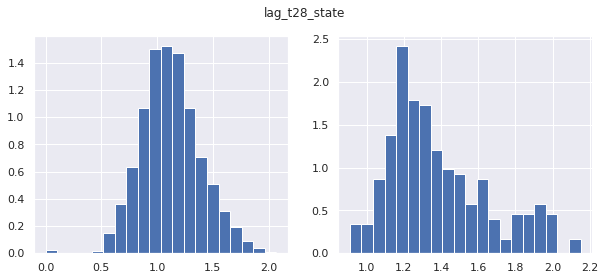

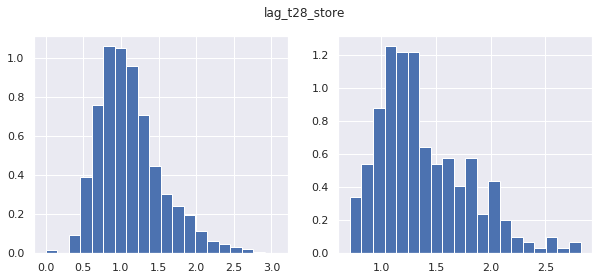

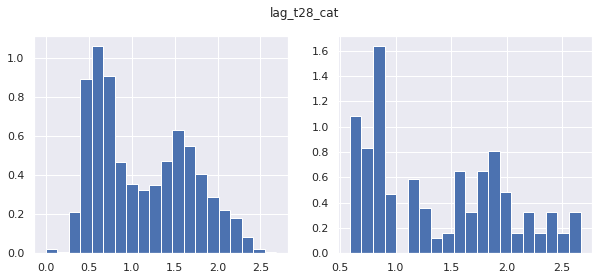

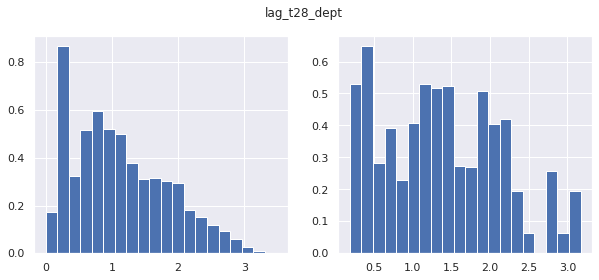

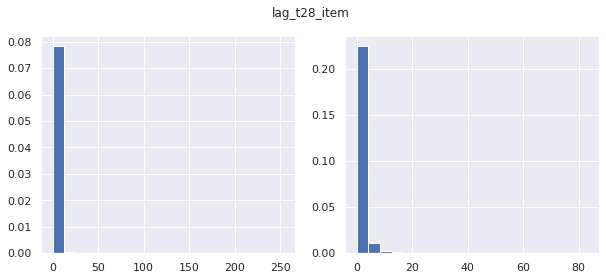

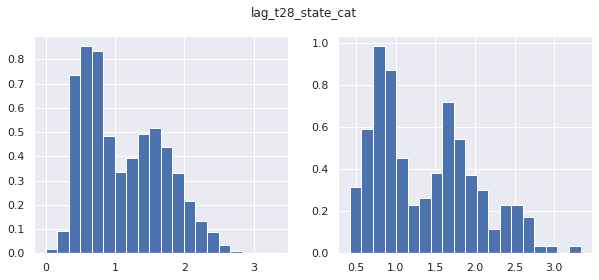

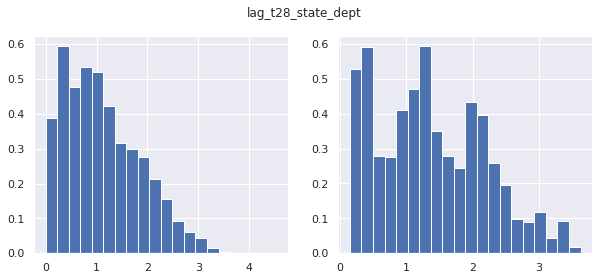

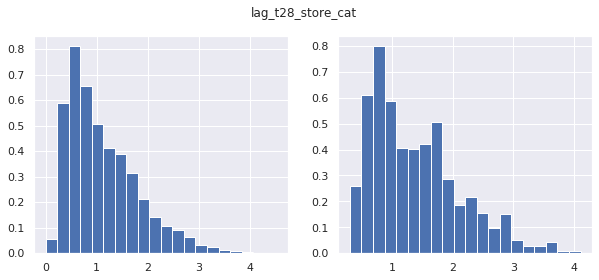

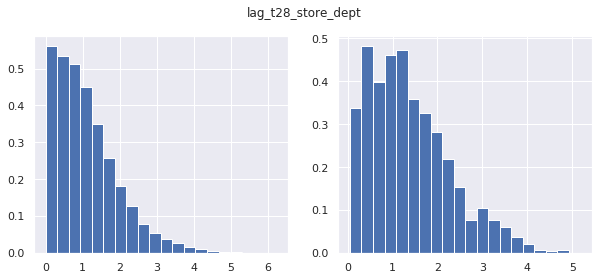

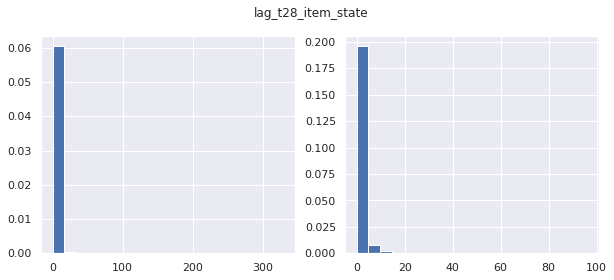

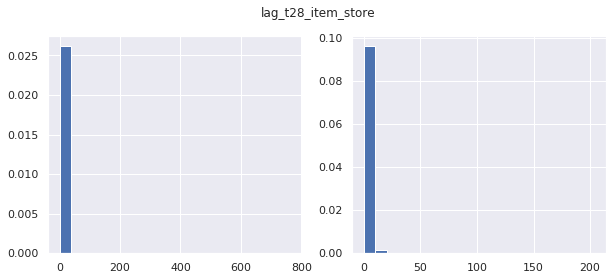

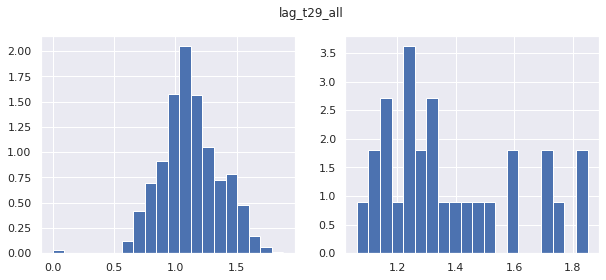

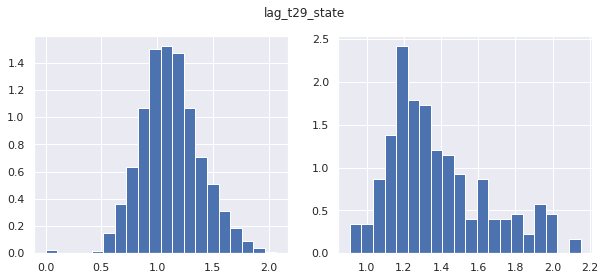

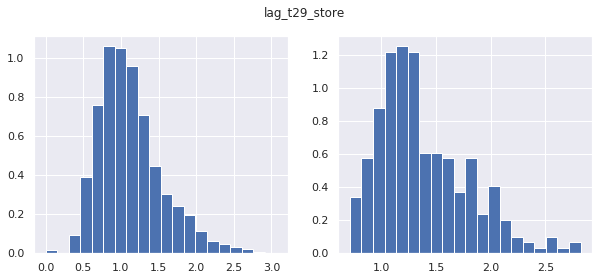

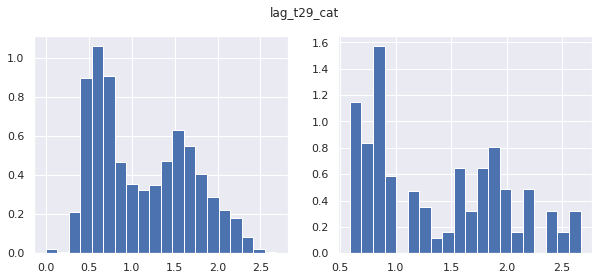

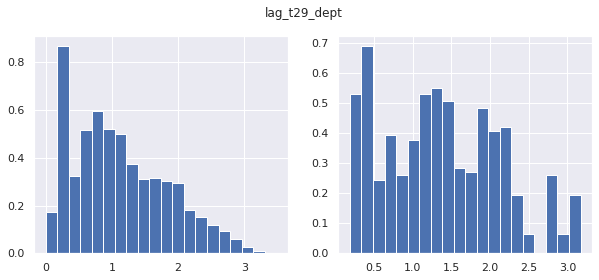

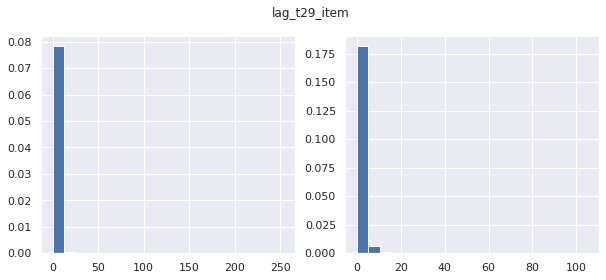

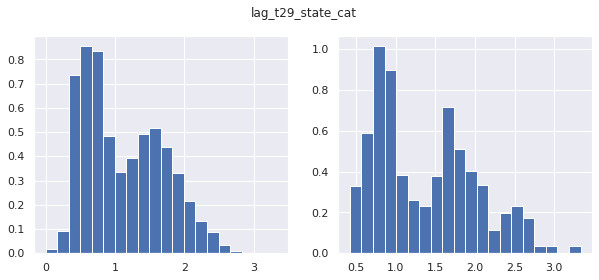

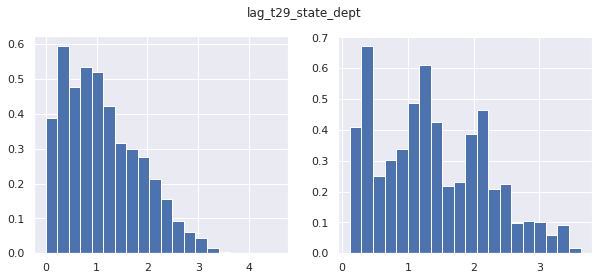

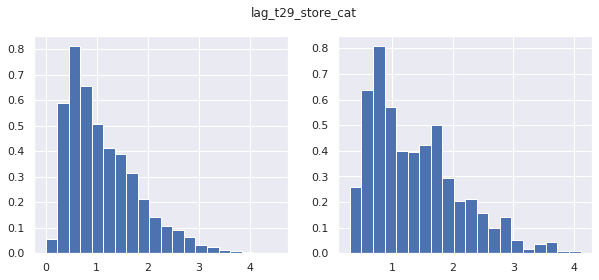

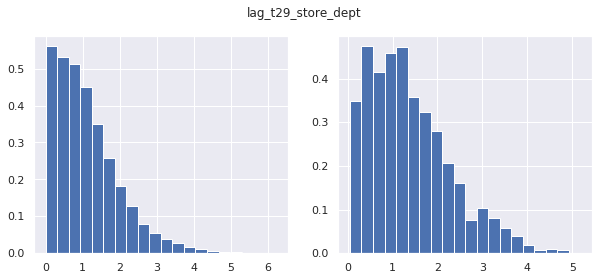

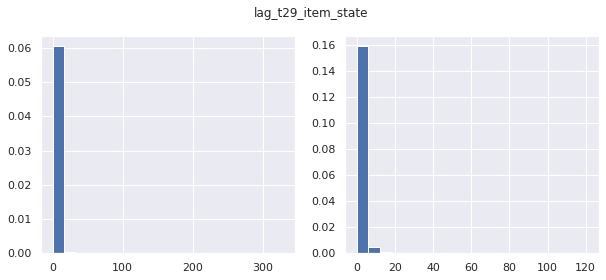

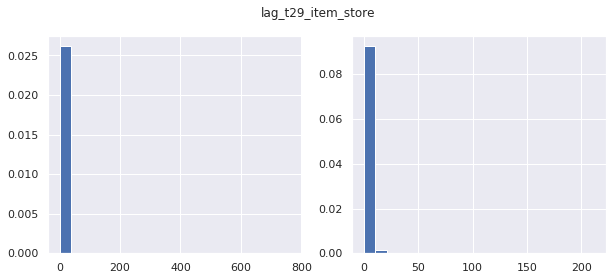

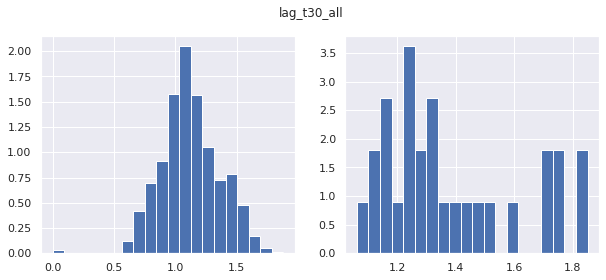

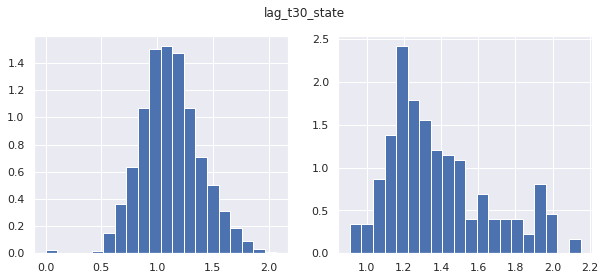

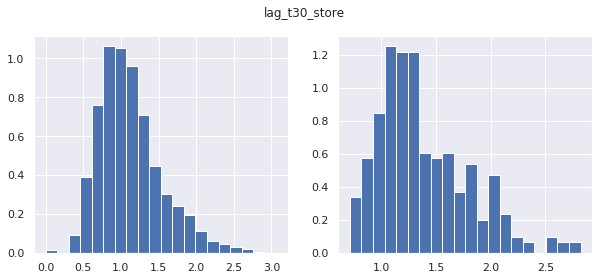

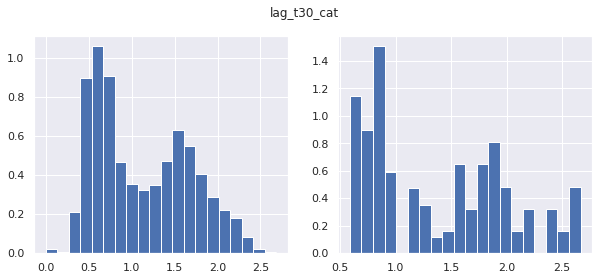

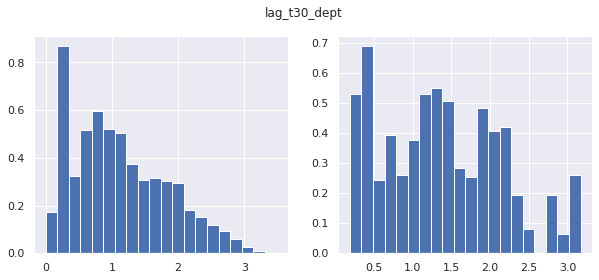

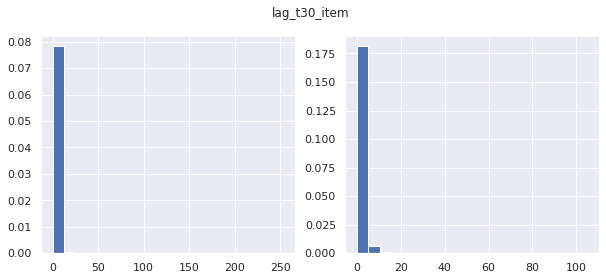

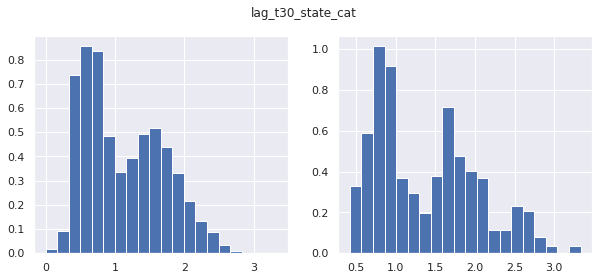

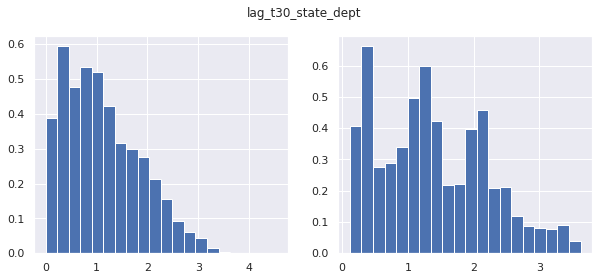

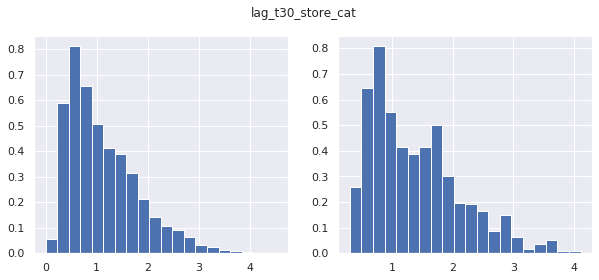

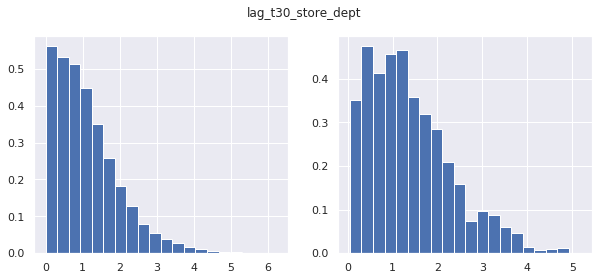

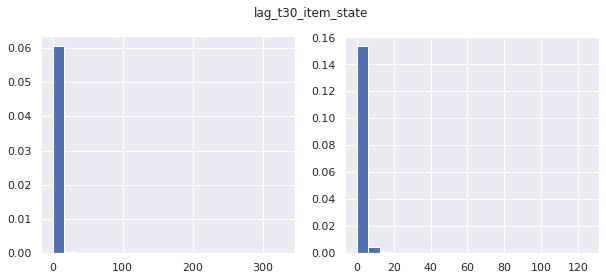

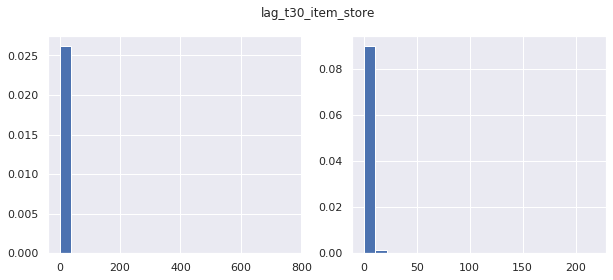

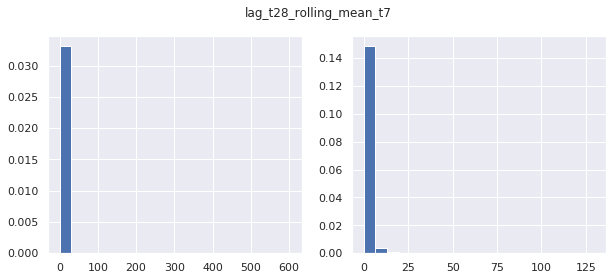

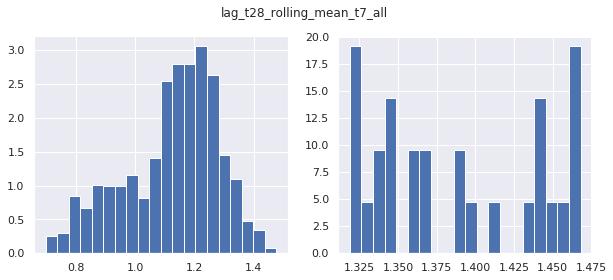

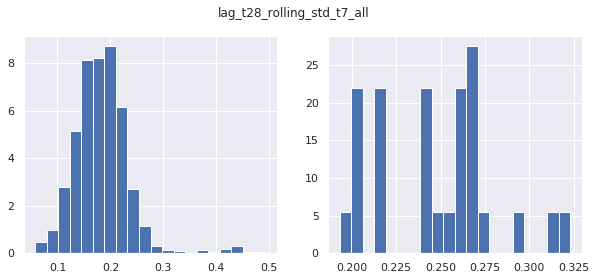

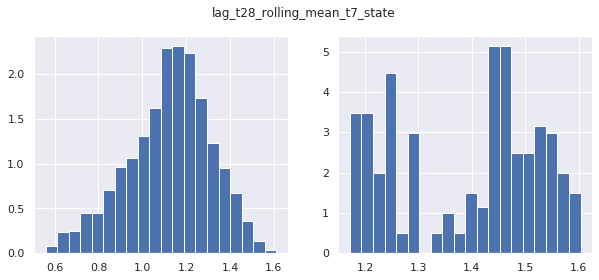

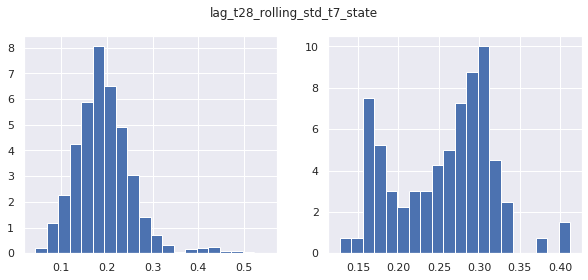

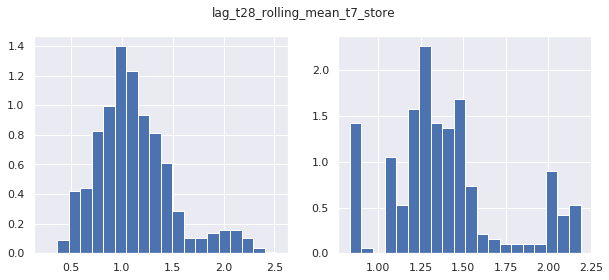

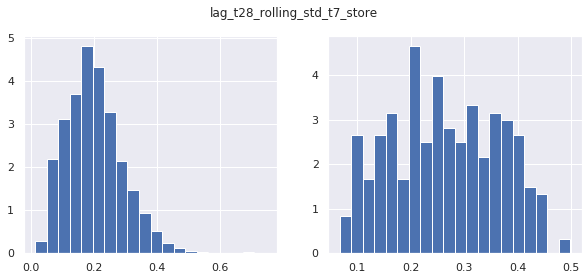

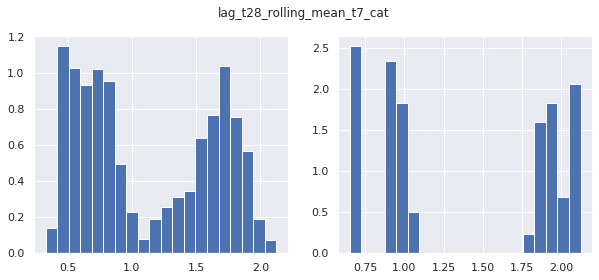

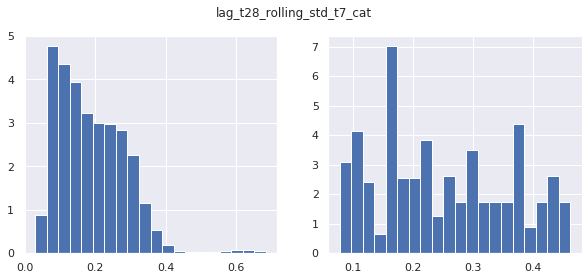

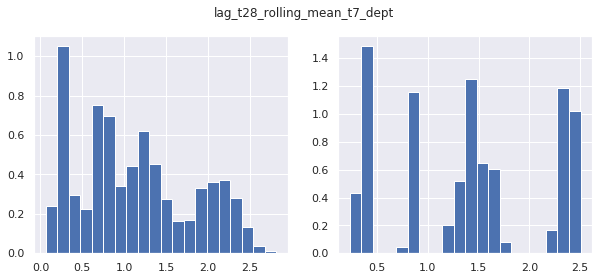

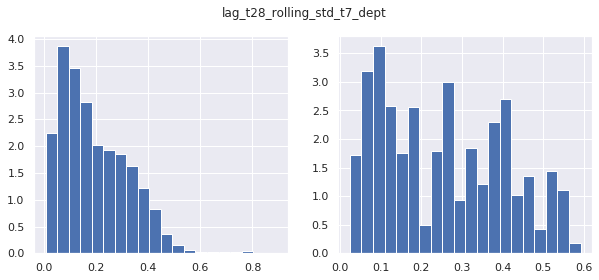

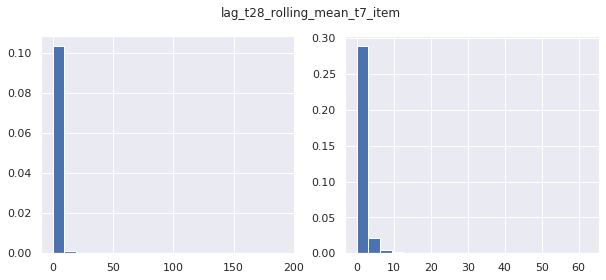

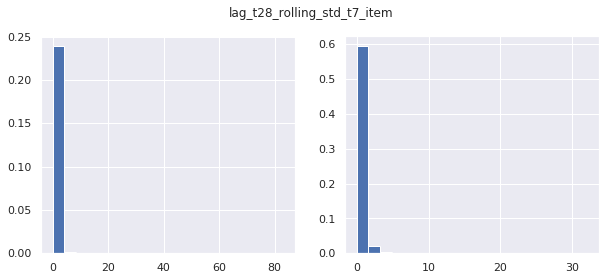

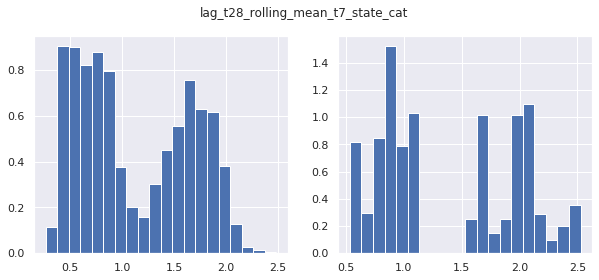

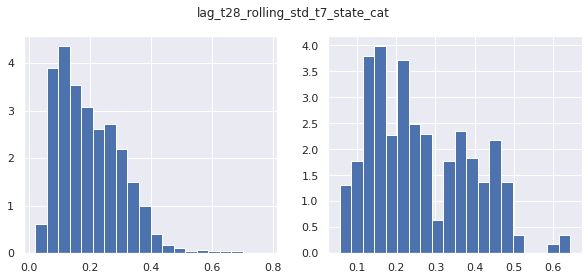

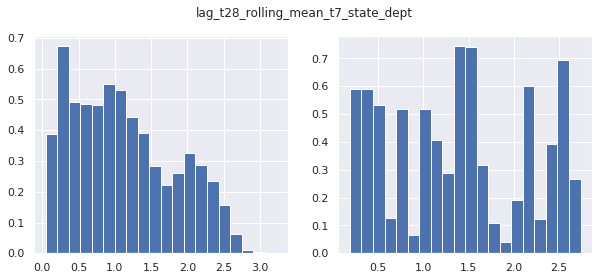

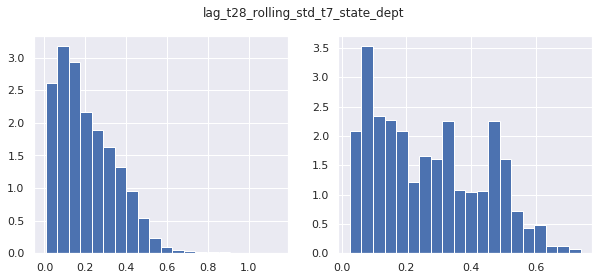

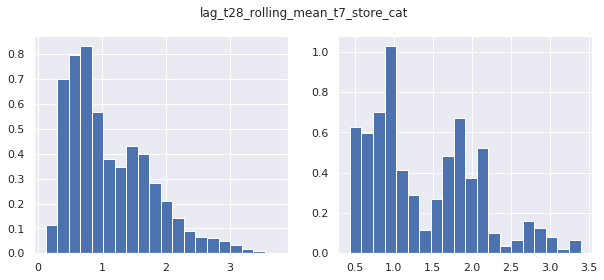

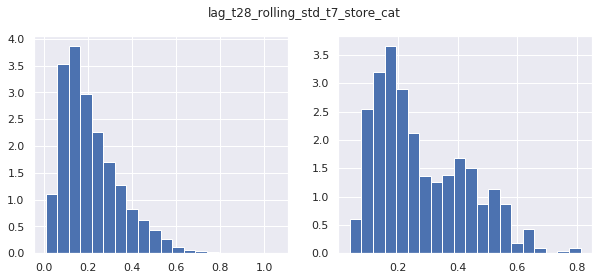

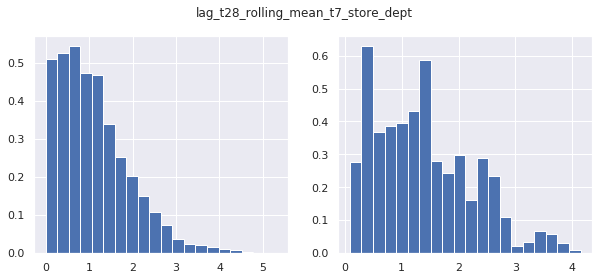

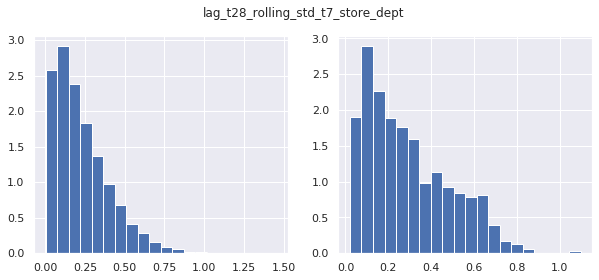

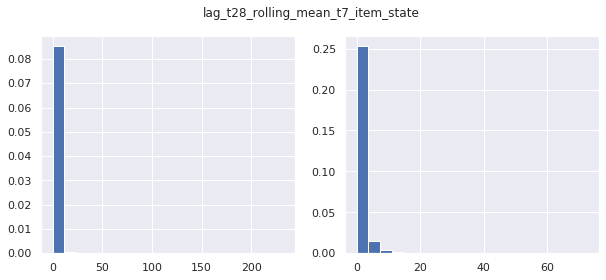

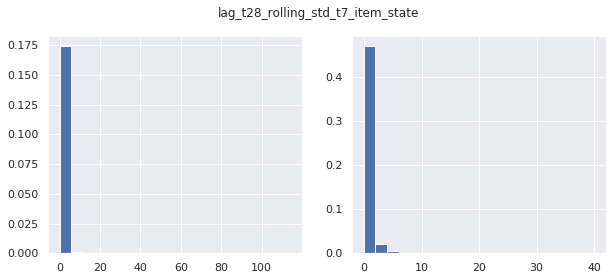

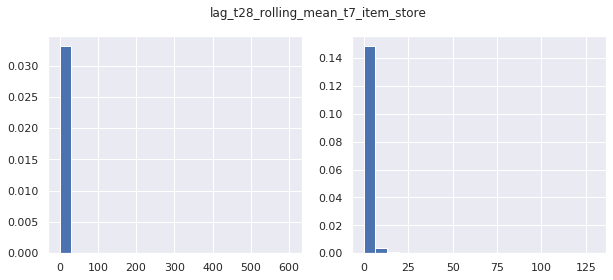

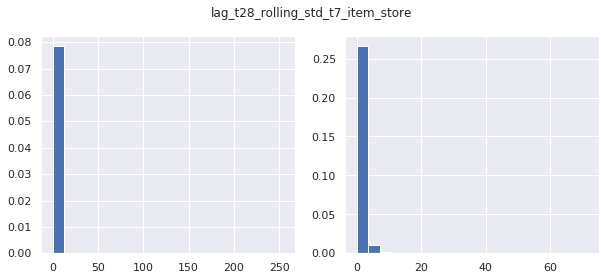

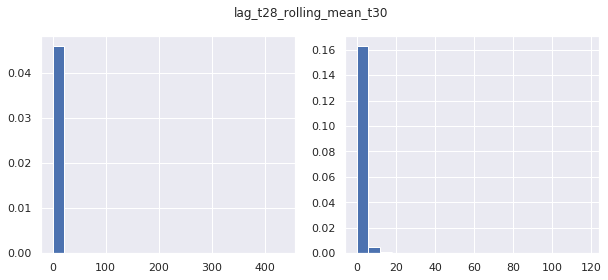

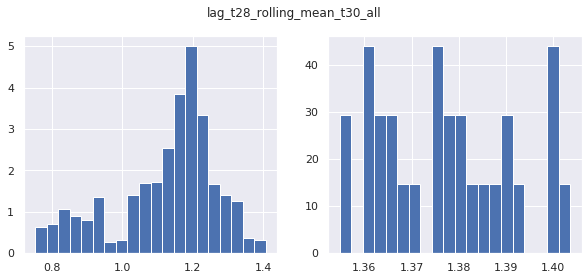

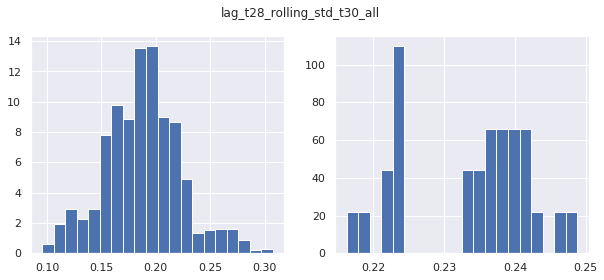

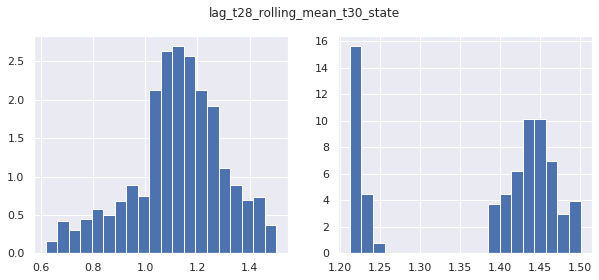

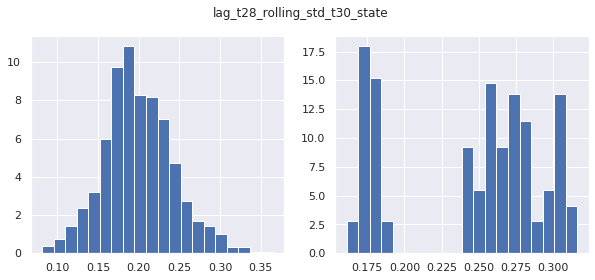

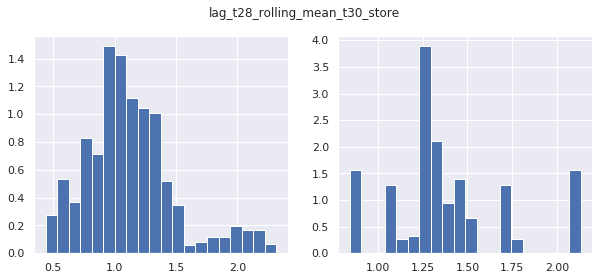

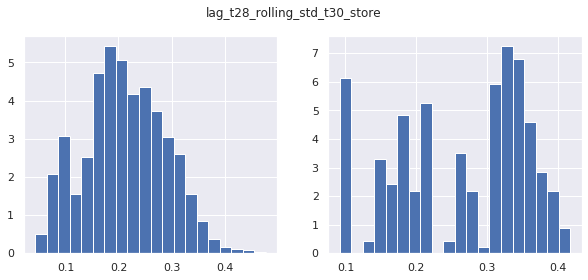

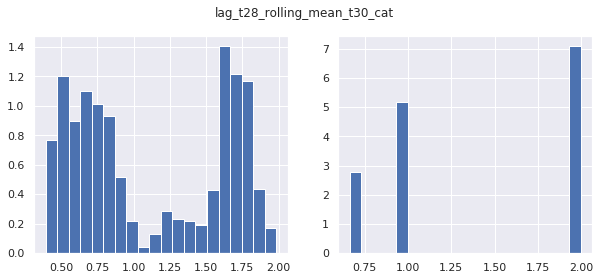

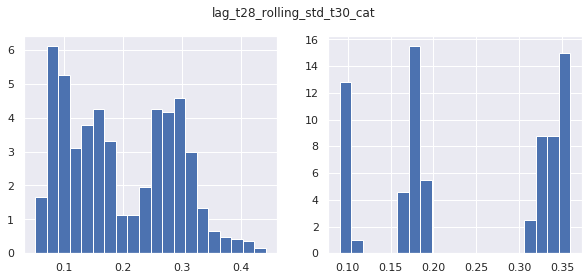

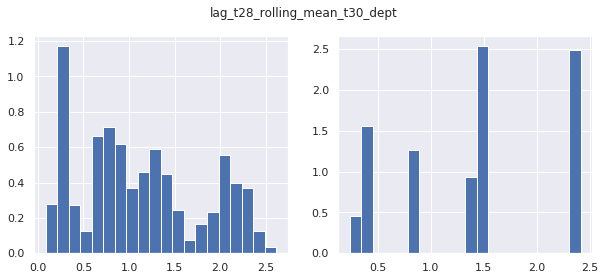

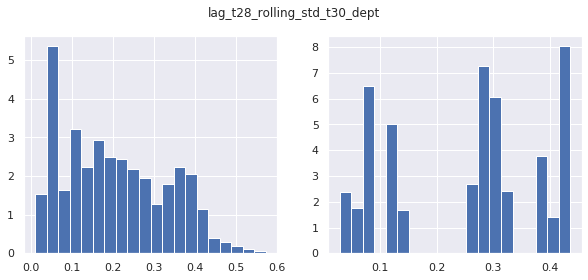

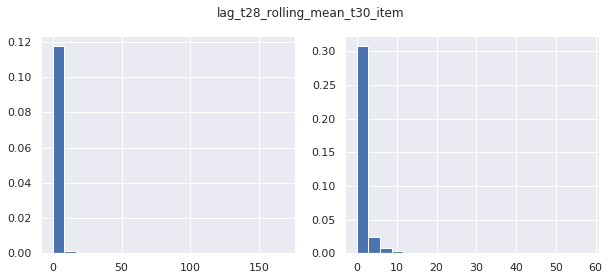

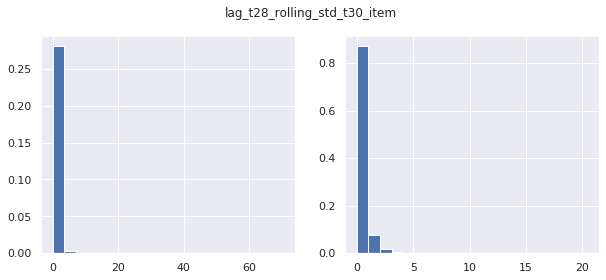

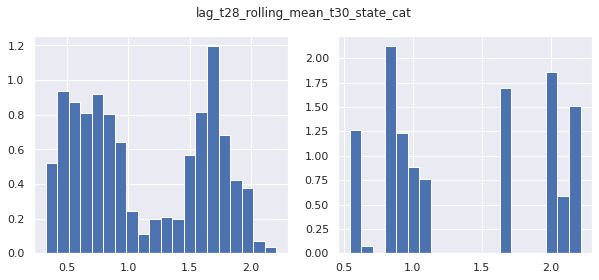

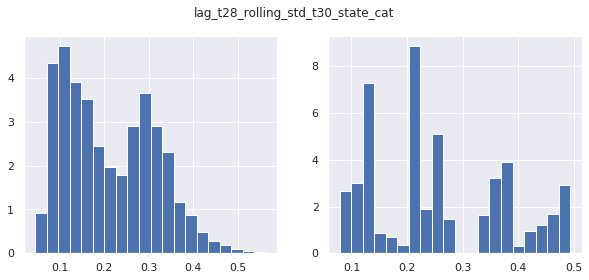

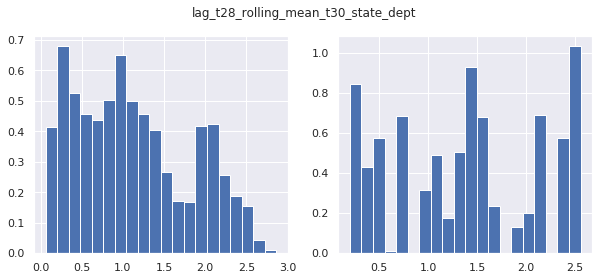

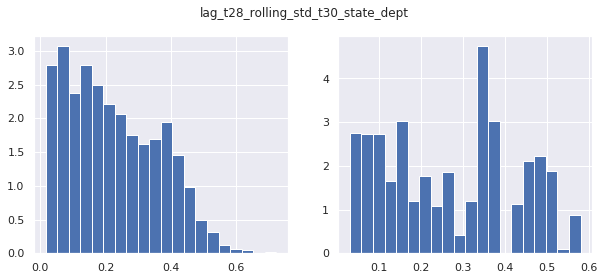

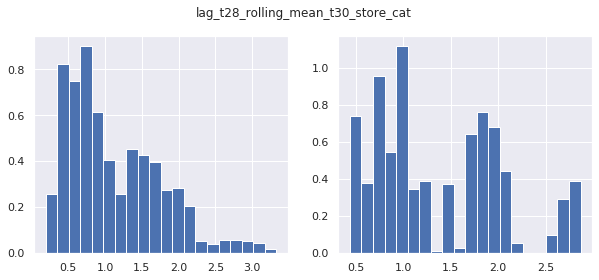

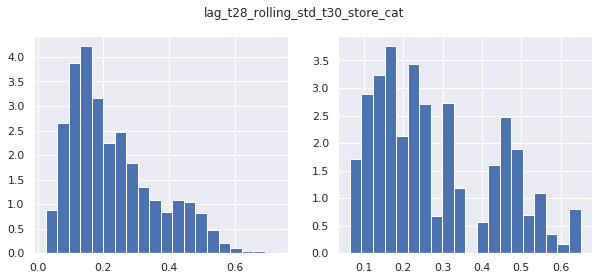

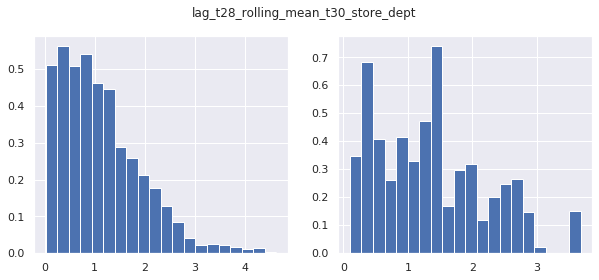

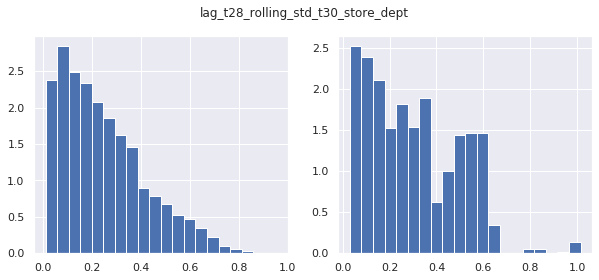

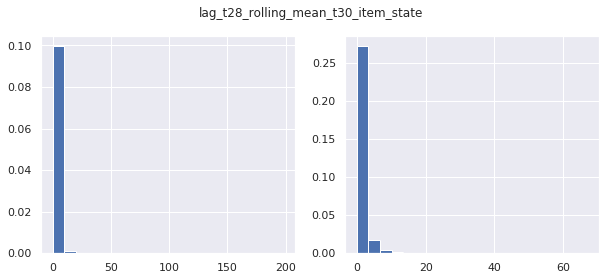

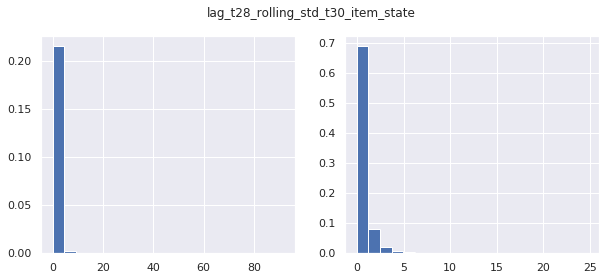

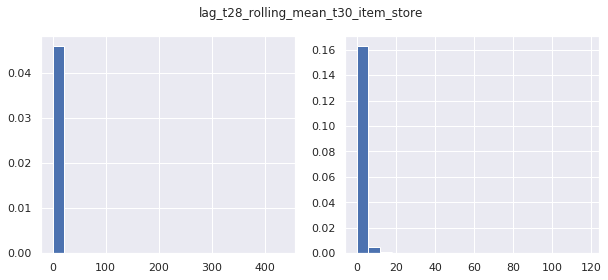

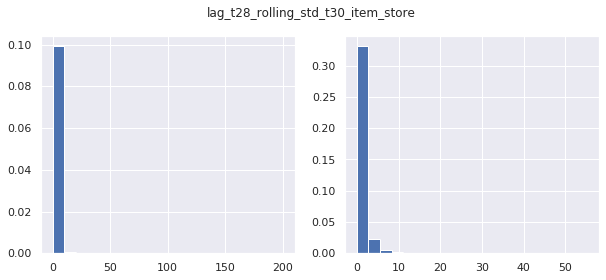

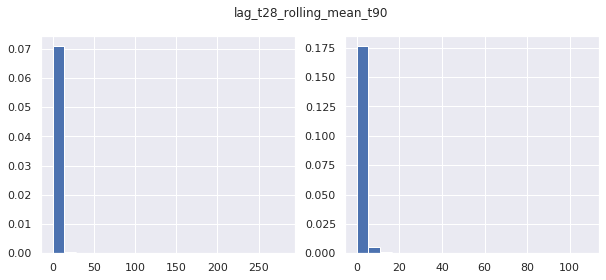

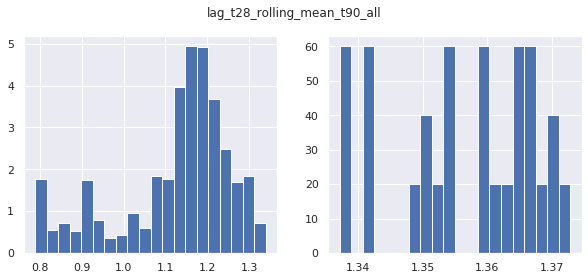

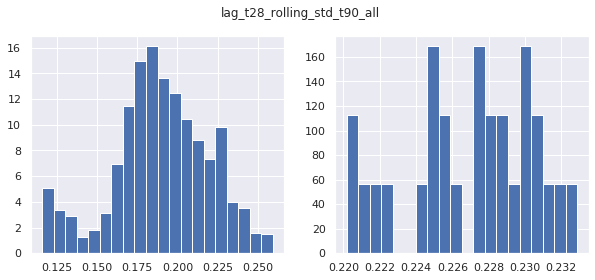

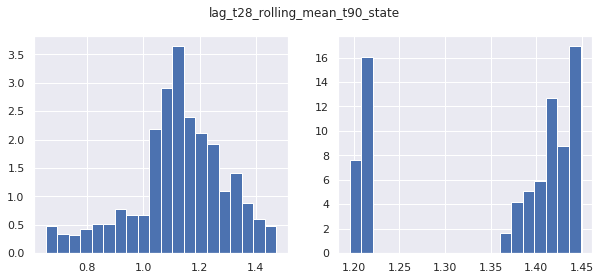

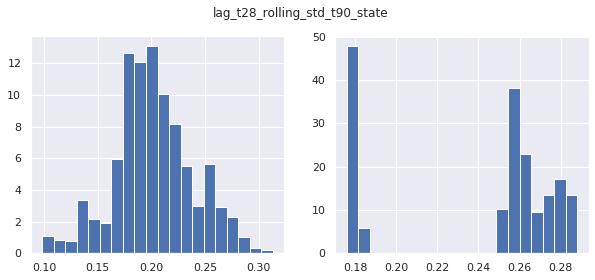

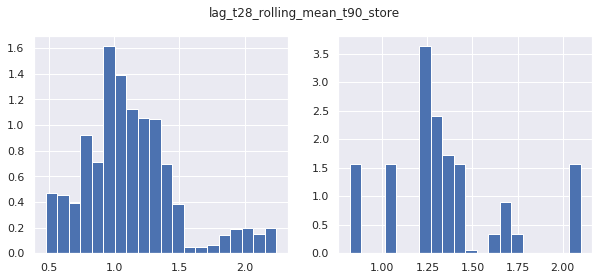

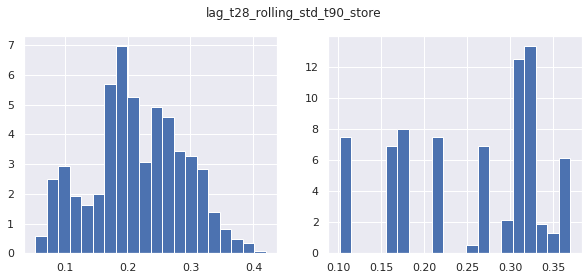

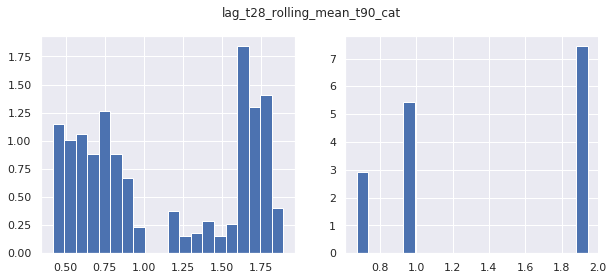

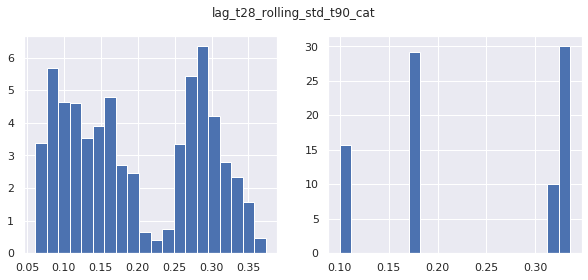

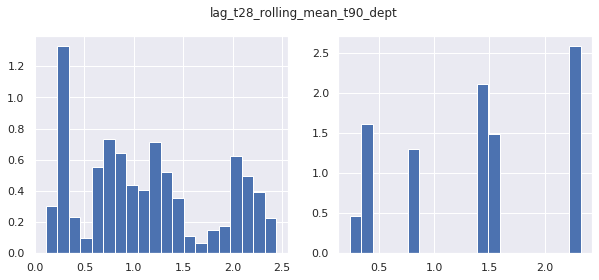

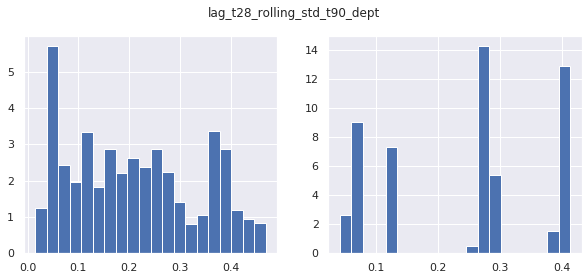

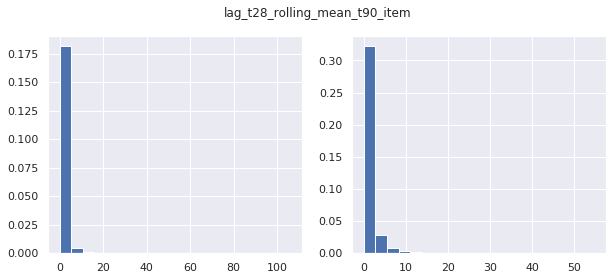

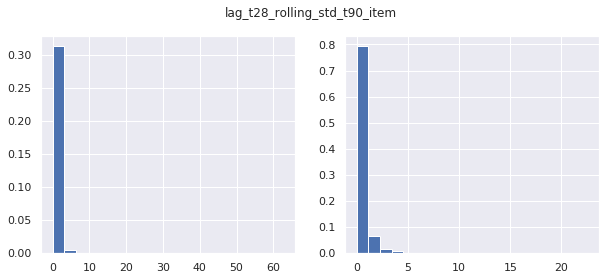

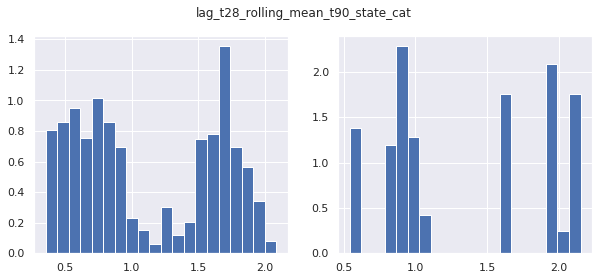

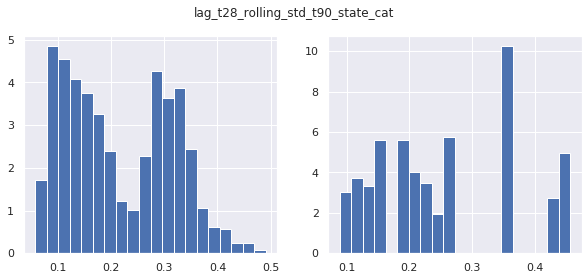

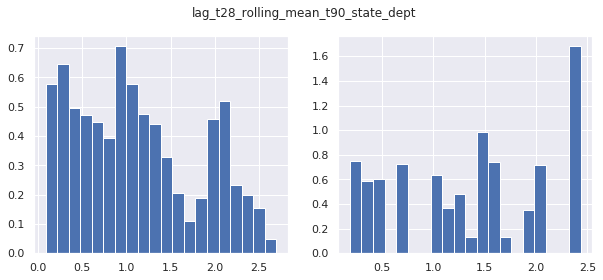

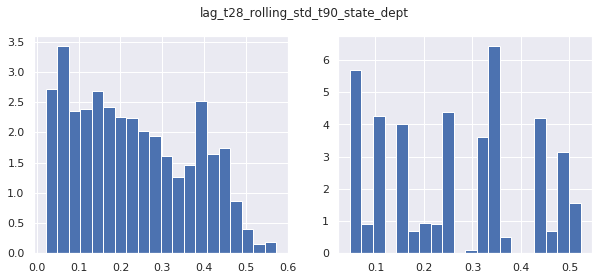

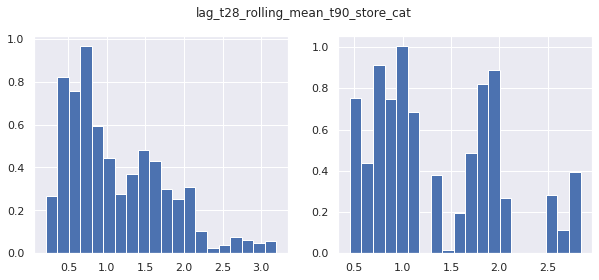

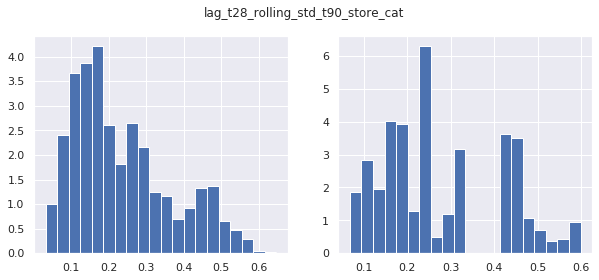

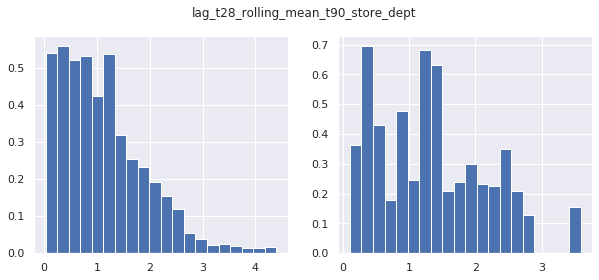

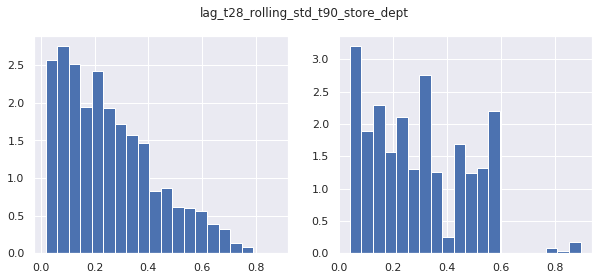

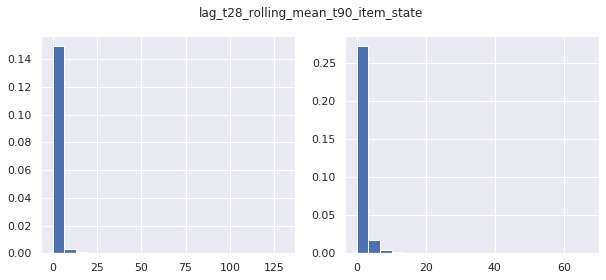

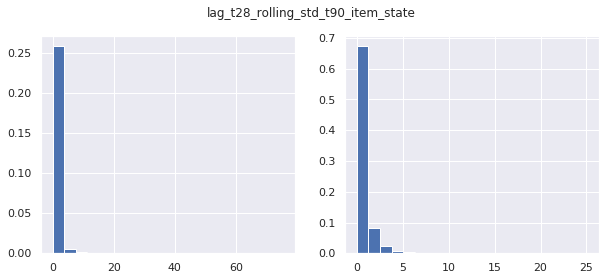

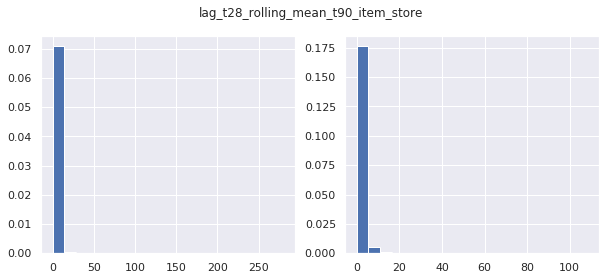

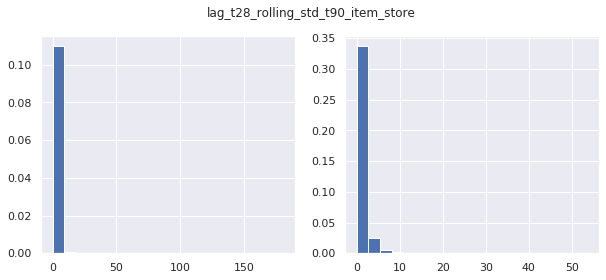

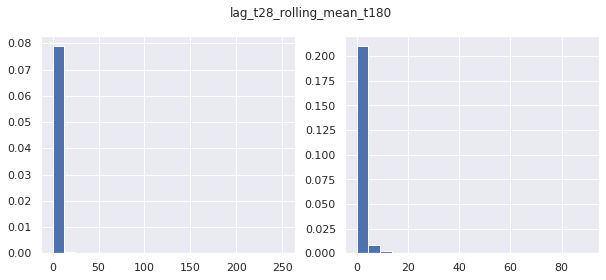

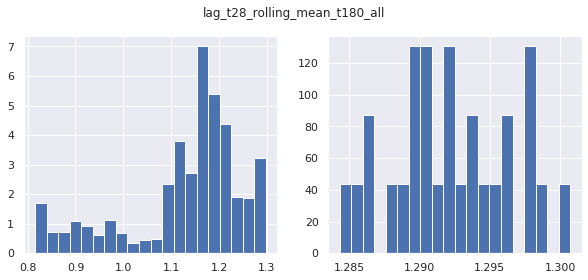

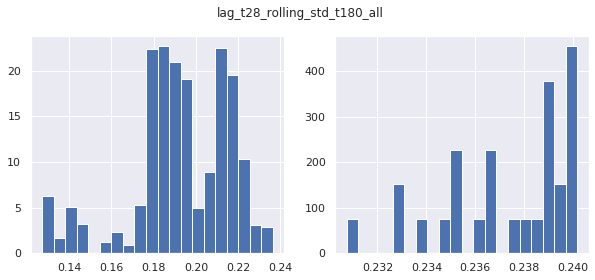

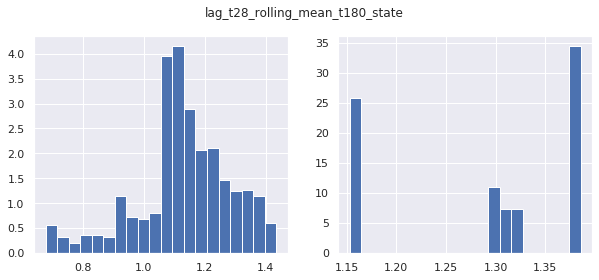

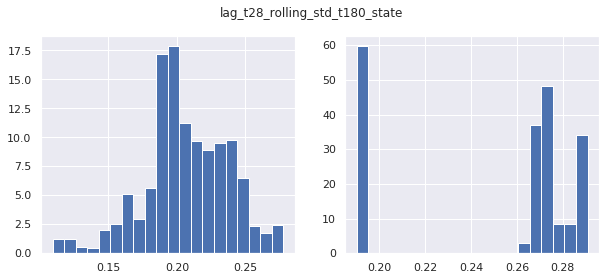

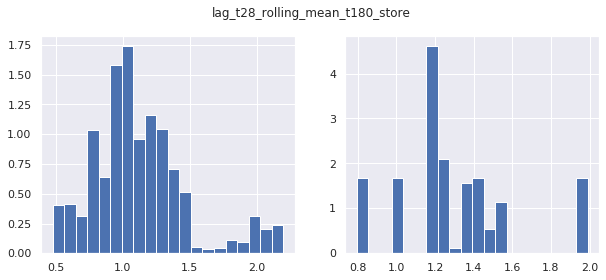

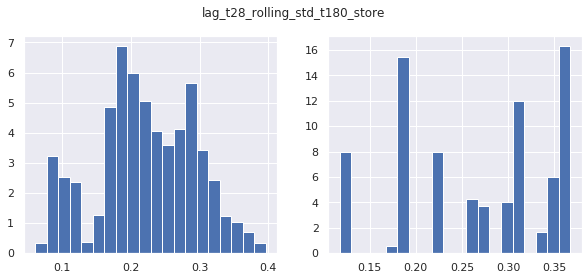

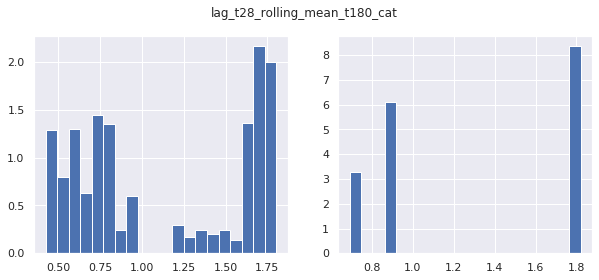

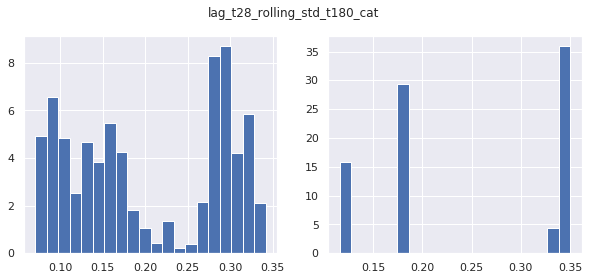

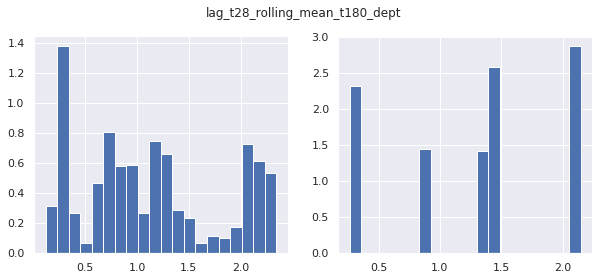

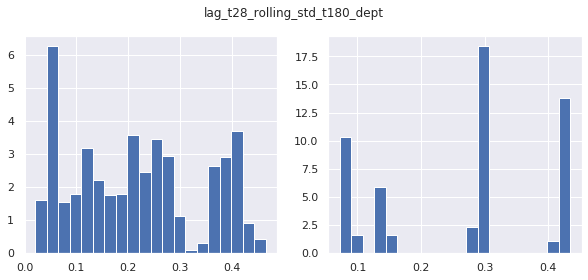

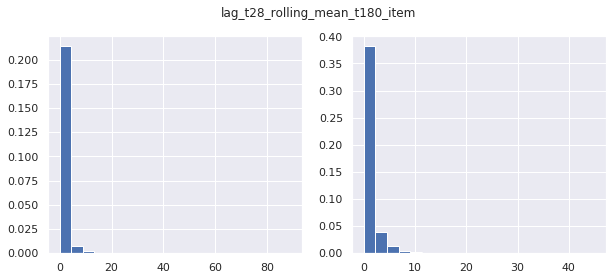

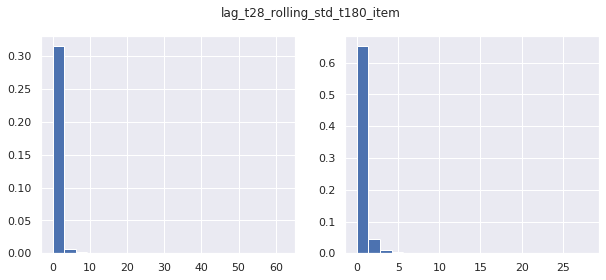

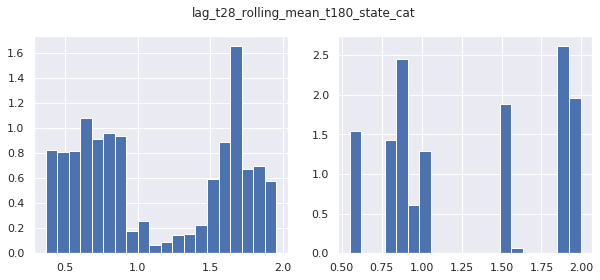

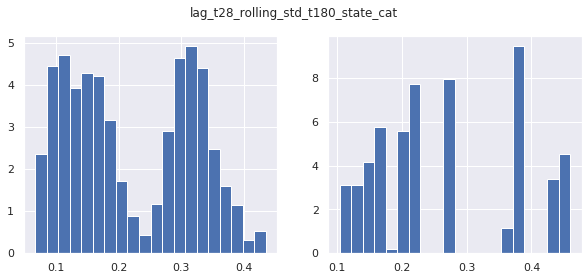

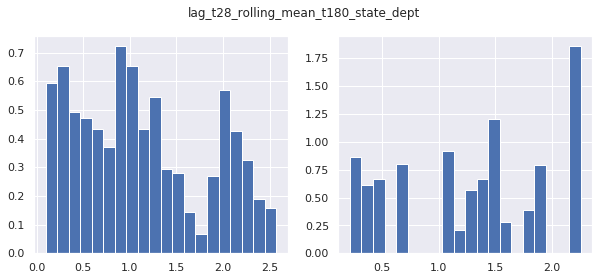

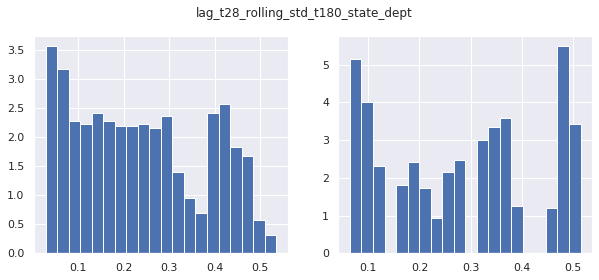

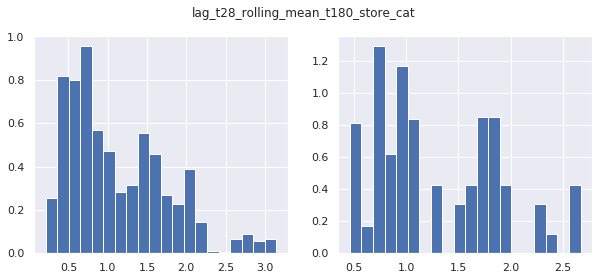

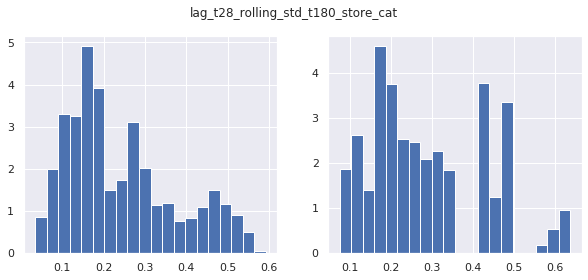

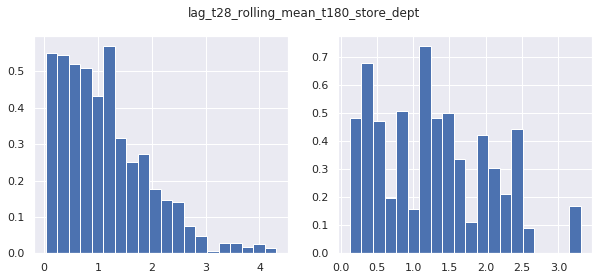

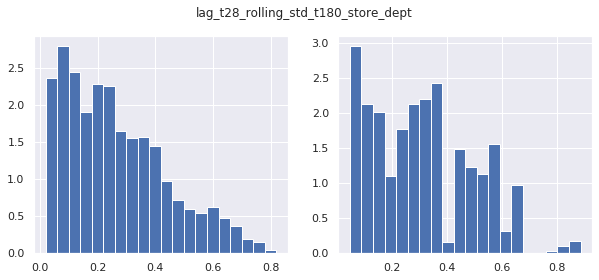

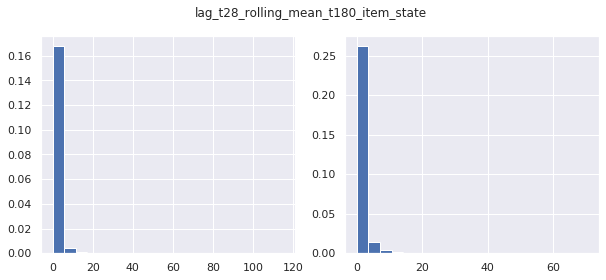

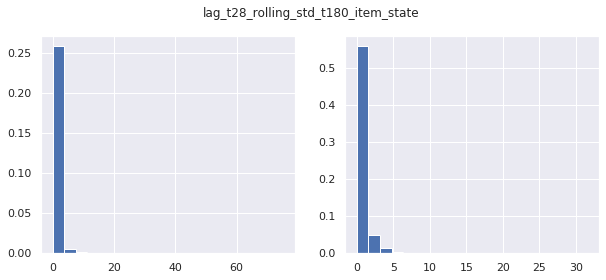

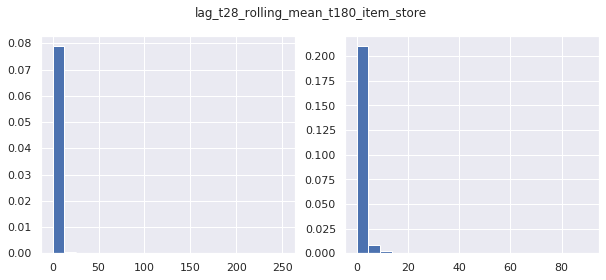

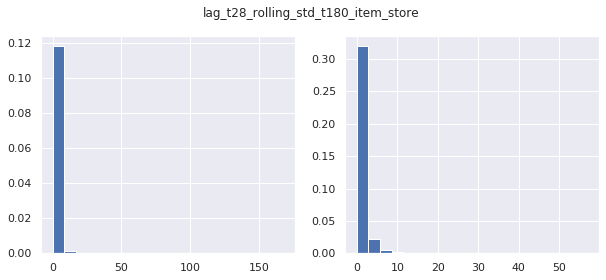

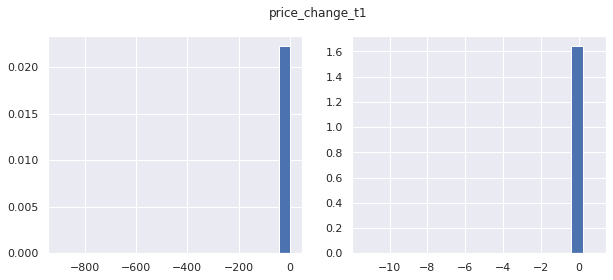

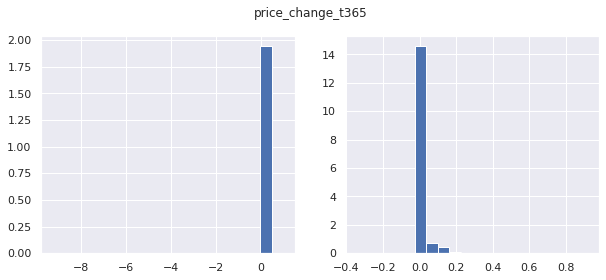

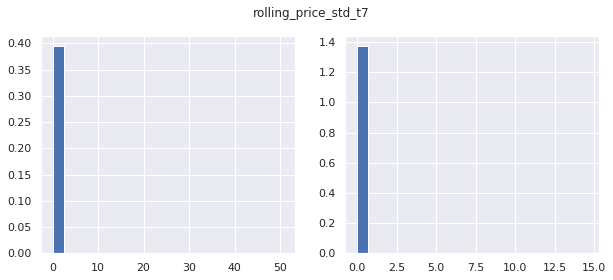

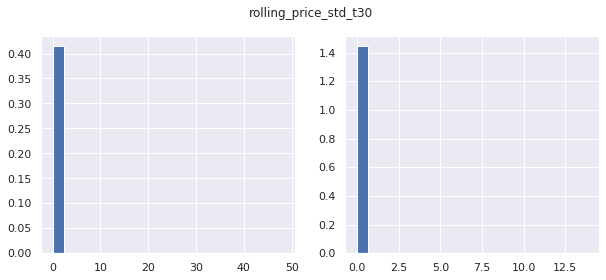

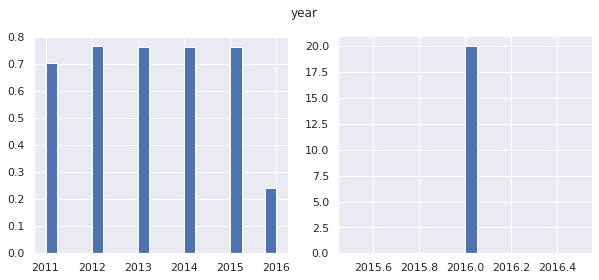

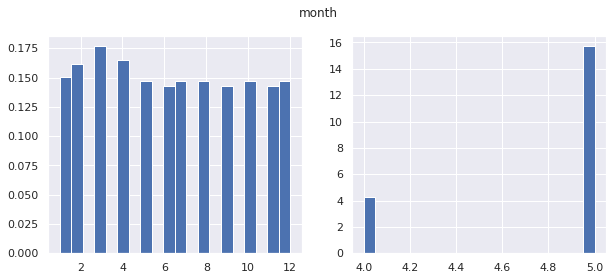

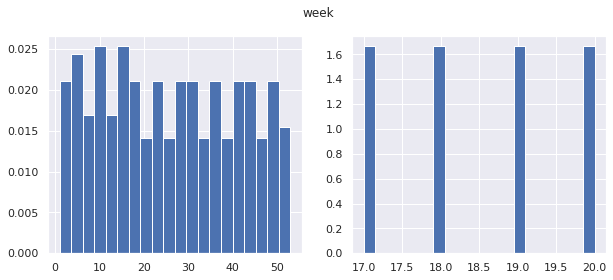

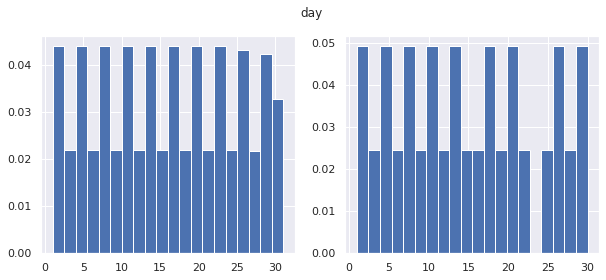

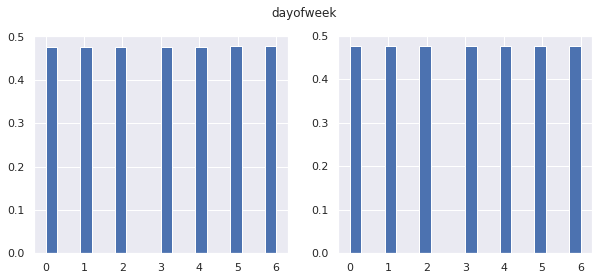

In [43]:
check_cols = [col for col in test_df.columns if col not in ['id', 'all_id', 'item_id', 'demand','dept_id', 'cat_id', 'store_id', 'state_id','part', 'date', 'wm_yr_wk']]
for col in check_cols:
    show_feat_hist(train_df, test_df, col, bins=20)
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# #     target_col = 'lag_t28_item'
#     fig.suptitle(f'{col}')
#     ax1.hist(train_df[col], bins=10, range=(0,10), normed=True)
#     ax2.hist(test_df[col], bins=10, range=(0,10), normed=True)
# #     fig.savefig(f'{col}.png')
#     fig.show()